In [1]:
pip install google-cloud-bigquery

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas_gbq 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install Matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [6]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
df1 = pd.read_csv('players.csv')
df2 = pd.read_csv('players_teams.csv')
df3 = pd.read_csv('teams.csv')
df4 = pd.read_csv('awards_players.csv')

In [1]:
# Objetivo: Vamos a crear la conexión con BigQuery y vamos a leer mediante consulta SQL desde Python.
# Generamos conexion a BQ
from google.oauth2 import service_account # para generar conexion
bq_cred = service_account.Credentials.from_service_account_file('uvm-casopractico-s16-7619a96886b9.json')

In [3]:
# Enviamos el df a BQ - Podemos crear o reemplazar una tabla
import pandas_gbq # para interactuar con BQ
pandas_gbq.to_gbq(df1, 'Caso16b.players', project_id= 'uvm-casopractico-s16', if_exists= 'replace', credentials = bq_cred)

100%|██████████| 1/1 [00:00<?, ?it/s]


In [4]:
pandas_gbq.to_gbq(df2, 'Caso16b.players_teams', project_id= 'uvm-casopractico-s16', if_exists= 'replace', credentials = bq_cred)

100%|██████████| 1/1 [00:00<?, ?it/s]


In [5]:
pandas_gbq.to_gbq(df3, 'Caso16b.teams', project_id= 'uvm-casopractico-s16', if_exists= 'replace', credentials = bq_cred)

100%|██████████| 1/1 [00:00<?, ?it/s]


In [6]:
pandas_gbq.to_gbq(df4, 'Caso16b.awards_players', project_id= 'uvm-casopractico-s16', if_exists= 'replace', credentials = bq_cred)

100%|██████████| 1/1 [00:00<?, ?it/s]


In [17]:
# Si queremos leer una tabla
import pandas as pd # para leer BQ
#CONSULTA - Contar jugadores únicos por país 
sql = """
SELECT hscountry, COUNT(DISTINCT playerID) as jugadores_por_pais
FROM `uvm-casopractico-s16.Caso16b.players`
GROUP BY hscountry
ORDER BY jugadores_por_pais DESC
"""
df_bq = pd.read_gbq(sql, project_id='uvm-casopractico-s16', credentials = bq_cred, dialect='standard') #Dialect standard: para usar BigQuery’s standard SQL dialect
print(df_bq)


    hscountry  jugadores_por_pais
0         USA                 842
1        None                 138
2         CAN                   4
3         AUS                   3
4         YUG                   3
5         FRA                   2
6   hsCountry                   1
7         NGR                   1
8         BRA                   1
9     USA/CAN                   1
10        LAT                   1
11        BAH                   1
12  USA / PUR                   1
13    YUG/USA                   1


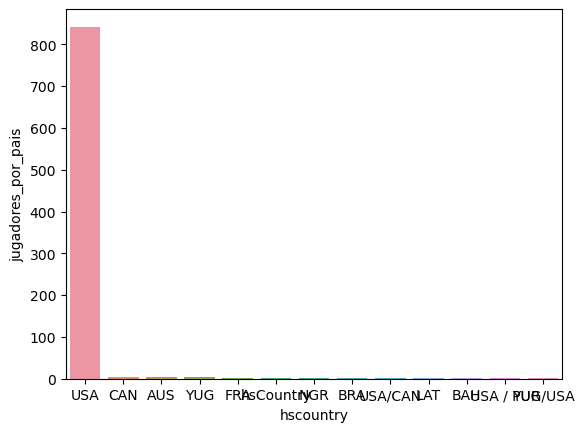

In [18]:
#GRÁFICO - BARRAS - Jugadores únicos por país 
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='hscountry', y='jugadores_por_pais', data=df_bq)
plt.show()

In [19]:
#CONSULTA - Jugadores con mas de 2000 puntos 
sql = """
SELECT
  tmID,  playerid, 
  MAX(points) AS MAYOR_PUNTAJE
FROM `uvm-casopractico-s16.Caso16b.players_teams`
WHERE points >= 2000
GROUP BY tmID, playerID
ORDER BY MAYOR_PUNTAJE DESC

"""
df_bq = pd.read_gbq(sql, project_id='uvm-casopractico-s16', credentials = bq_cred, dialect='standard') #Dialect standard: para usar BigQuery’s standard SQL dialect
print(df_bq)

  tmID   playerid  MAYOR_PUNTAJE
0  MIL  abdulka01           2822
1  KCO  archina01           2719
2  WAS  arenagi01           2346
3  DAL  aguirma01           2330
4  LAL  abdulka01           2275
5  CIN  archina01           2145
6  DEN  anthoca01           2122


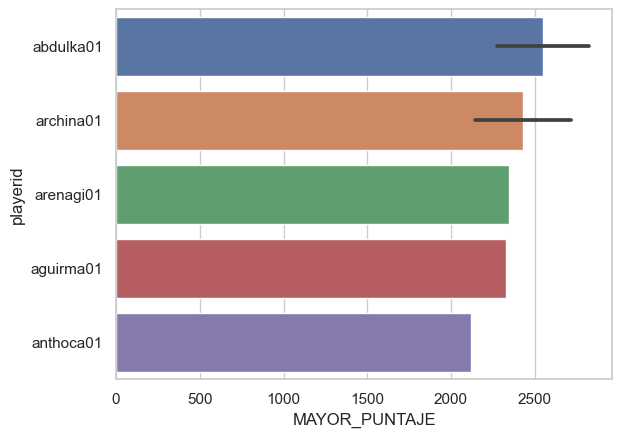

In [20]:
#GRÁFICO - BARRAS - Jugadores con mas de 2000 puntos 
sns.set_theme(style="whitegrid")
sns.barplot(x='MAYOR_PUNTAJE', y='playerid', data=df_bq)
plt.show()

In [30]:
#CONSULTA - Jugadores con más de un premio por año
sql = """
SELECT playerID, year, COUNT(playerID) AS MVP
FROM `uvm-casopractico-s16.Caso16b.awards_players`
GROUP BY playerID, year
HAVING COUNT(playerID) > 1
ORDER BY year DESC;
"""
df_bq = pd.read_gbq(sql, project_id='uvm-casopractico-s16', credentials = bq_cred, dialect='standard') #Dialect standard: para usar BigQuery’s standard SQL dialect
print(df_bq)

      playerID  year  MVP
0    jamesle01  2011    4
1    irvinky01  2011    2
2    chandty01  2011    3
3    howardw01  2011    2
4    bryanko01  2011    2
..         ...   ...  ...
171  chambwi01  1965    2
172  lucasje01  1963    2
173  chambwi01  1959    3
174  bayloel01  1958    2
175  cousybo01  1956    2

[176 rows x 3 columns]


In [39]:
#CONSULTA - Premios por año
sql = """
SELECT year, COUNT(playerID) AS MVP
FROM `uvm-casopractico-s16.Caso16b.awards_players`
GROUP BY year
ORDER BY year DESC;
"""
df_bq = pd.read_gbq(sql, project_id='uvm-casopractico-s16', credentials = bq_cred, dialect='standard') #Dialect standard: para usar BigQuery’s standard SQL dialect
print(df_bq)

    year  MVP
0   2011   30
1   2010   27
2   2009   30
3   2008   27
4   2007   25
..   ...  ...
67  1942    1
68  1941    2
69  1939    1
70  1938    1
71  1937    2

[72 rows x 2 columns]


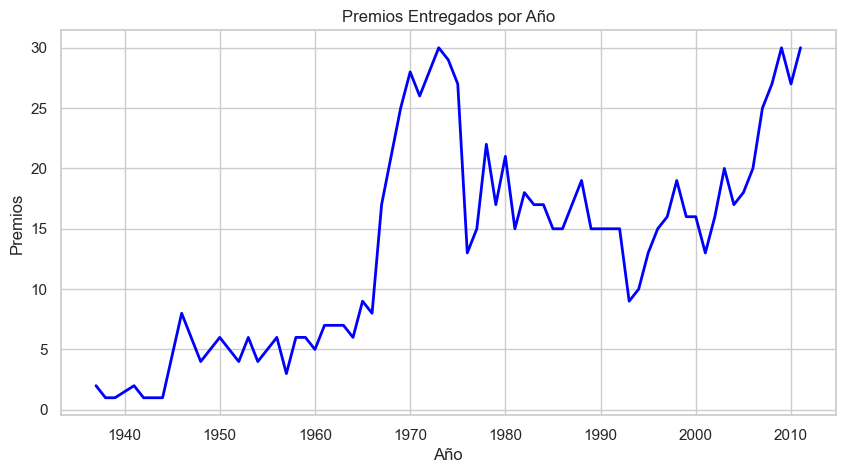

In [40]:
#GRÁFICO - BARRAS - Premios por año
# Para una serie temporal
import matplotlib.pyplot as plt
# Asegúrate de que 'year' y 'number' están en el formato correcto
# df['year'] debe ser de tipo datetime, para asegurarlos
df_bq['year'] = pd.to_datetime(df_bq['year'], format='%Y')
# Asegúrate de que los datos están ordenados por 'year'
df_bq = df_bq.sort_values('year')
# Crea la figura y el eje
plt.figure(figsize=(10, 5))
plt.plot(df_bq['year'], df_bq['MVP'], marker='', color='blue', linewidth=2)
# Título y etiquetas
plt.title('Premios Entregados por Año')
plt.xlabel('Año')
plt.ylabel('Premios')
# Mostrar la gráfica
plt.show()

In [36]:
#CONSULTA - Lista de Jugadores por Equipo
sql = """
SELECT DISTINCT
  t.name,
  p.firstName,
  p.lastName
FROM `uvm-casopractico-s16.Caso16b.players` p
JOIN `uvm-casopractico-s16.Caso16b.players_teams` pt
  ON p.playerID = pt.playerID
JOIN `uvm-casopractico-s16.Caso16b.teams` t
  ON pt.lgID = t.lgID
ORDER BY t.name,p.lastName
;
"""
df_bq = pd.read_gbq(sql, project_id='uvm-casopractico-s16', credentials = bq_cred, dialect='standard') #Dialect standard: para usar BigQuery’s standard SQL dialect
print(df_bq)

                            name firstName    lastName
0      Akron Firestone Non-Skids      John   Abramovic
1      Akron Firestone Non-Skids    Howard       Adams
2      Akron Firestone Non-Skids   Raymond       Adams
3      Akron Firestone Non-Skids     Glenn       Adams
4      Akron Firestone Non-Skids    Willie       Adams
...                          ...       ...         ...
11289           Youngstown Bears      Carl        Baer
11290           Youngstown Bears     Frank       Baird
11291           Youngstown Bears       Bob       Baker
11292           Youngstown Bears       Art  Bakeraitis
11293           Youngstown Bears   Herbert        Ball

[11294 rows x 3 columns]
